# DESERCIÓN ESCOLAR A NIVEL MEDIO SUPERIOR EN MÉXICO PARA EL AÑO 2011.

## Integrantes 
- Hernández Velázquez Jorge Luis.
- Murcia Rojas Tania.
- Reyes Martínez Elías.
- Solórzano Rodríguez José Luis. 

## 1. Planteamiento del problema

Cuando se habla de educación en el país inevitablemente se hablará de los problemas que con ella vienen; mismos que tienen diferentes causas y se encuentran situadas en distintas dimensiones. Las áreas donde frecuentemente se localizan los problemas tienen su procedencia desde el enfoque institucional, social o económico. 

La profundidad y dimensión de los problemas varían dependiendo el contexto social, político y económico, sin embargo, dadas las características de nuestro país la deserción escolar tiene un apartado central dentro de la presente problemática. De acuerdo con las estadísticas ofrecidas por la Secretaría de Educación Pública para 2010- 2011 el porcentaje de deserción escolar a nivel medio superior se encontraba en 14.4%, cifra que para el periodo 2018- 2019 solo ha disminuido a 12.9%, mientras que las tasas de terminación se encontraban en 61.8% y 63.6% respectivamente. 

Debido a que la tasa de deserción escolar no ha variado considerablemente en el tiempo, se hace indispensable llevar a cabo una revisión de los factores que han influido sobre los ciudadanos a la hora de tomar una decisión respecto a seguir estudiando o no, para ello nos hemos remitido a estudiar la situación de deserción en la educación a nivel medio superior en México para el año 2011.
 


## 2. Justificación

Debido a la situación que hasta la actualidad México ha enfrentado respecto a la deserción escolar en el nivel medio superior se hace indispensable realizar una investigación respeto a los factores que influyen en la elección de permanecer estudiando o no hacerlo de los ciudadanos que se encuentran en el rango de edad entre 14 y 25 años. 

Es por ello que la investigación tendrá como conveniencia aportar evidencia empírica sobre la probabilidad de que una persona deserte en el nivel medio superior para el caso mexicano en el año 2011 debido a factores económicos, institucionales, sociales e individuales. 

Con ello se busca que la Secretaría de Educación Pública (SEP) en coordinación con el Instituto Nacional para la Evaluación de la Educación (INEE) y la Subsecretaría de Educación Media Superior (SEMS) mejoren y en su defecto, generen políticas públicas con el objetivo de hacer más eficiente el  sistema educativo mexicano en pro de los estudiantes que más lo necesitan para evitar la deserción escolar.

## 3. Objetivo.

Identificar los factores que influyen en la decisión de la población estudiantil a la hora de desertar o no en el nivel medio superior en México para el año 2011. A través del empleo de un modelo de Probabilidad Logística (Probit) y con la finalidad de hallar evidencia empírica sobre este fenómeno. 

## 4. Hipótesis.
Para el año 2011 en México existía una tasa de deserción a nivel medio superior igual a el 14.4%, cifra que para 2019 tan solo ha disminuido 1.5%, de tal forma que el abandono de la educación sigue siendo un fuerte problema para el país.

Es en esta línea se debe destacar que la existencia de factores sociales, individuales y escolares influyen fuertemente en la decisión de abandonar los estudios a nivel medio superior.Atribuyendo a factores sociales la falta de dinero y recursos, la preferencia por trabajar, el tiempo de traslado hacia la escuela y el consumo de drogas; para el caso de factores individuales se contempla el matrimonio de estudiantes, la existencia de algún embarazo, confianza y una buena relación dentro de la familia, la formación de los padres en el nivel medio superior y si alguno de los hermanos fue desertor; por último, para el caso de factores educativos se contempla la confianza de los alumnos hacia directores o maestros, percepción de algun apoyo economico a traves de una beca, el promedio obtenido en el nivel educativo medio superior y si se reprobaron  varias materias.

En consecuencia, los factores antes expuestos se consideran de vital importancia para la toma de decisión por parte de los individuos, mismos factores que se analizarán posteriormente.



## 5. Evidencia empírica.
El fenómeno de deserción escolar en México ha sido estudiado por diferentes investigaciones tanto teóricas como empíricas, y a su vez en los diferentes niveles de educación. Para el caso de esta investigación se hará referencia únicamente a los trabajos referentes al nivel medio superior en México.

Espíndola y León (2002) realizan una investigación para la región de América Latina donde evalúan el impacto de los factores que ocasionan la deserción escolar. Dichos factores se pueden clasificar en socioeconómicos; pobreza, marginalidad, adscripción laboral, adicciones, anomalías familiares, factores de naturaleza extraescolar; el Estado, el mercado, la comunidad, los grupos ajenos al individuo y aquellos referente al marco institucional; bajo rendimiento, problemas conductuales, autoritarismo docente, el sistema escolar. Las conclusiones establecen la asignación de programas sociales cuyo objetivo sea disminuir la deserción escolar en la región desde etapas tempranas al nivel medio superior, y cuyos beneficios se verán reflejados en el combate a la desigualdad, cuyo último fin es impactar a largo plazo en las condiciones de vida de la población.

Ramírez, Gálvez e Ibarra (2010) estudian el caso de la deserción a nivel medio superior para el estado de Baja California mediante el análisis en el impacto de diferentes variables sobre este problema, como lo es, el económico, personales y académicos institucionales para el periodo 2007-200 gracias la recolección de una muestra y el uso de herramientas relacionales estadísticas, Chi cuadrada. Las conclusiones a las cuales llega la investigación establecen una relación negativa entre los ingresos del individuo y deserción escolar, la variable reprobar asignaturas y deserción es positiva; esto establece las dificultades cognitivas e intelectuales entre los estudiantes, sobre en materias referentes a matemáticas, existe una relación directa entre el apoyo académico institucional y el tema tratado, por último,  la relación entre variables como pedagogía docente, tutorías académicas, actividades extraescolares y estímulos escolares presentan una relación negativa con la deserción escolar.

Landero (2012) analiza la deserción escolar en el nivel medio superior mediante el análisis de diferentes programas sociales federales implementados para atender esta problemática. Para realizar lo anterior, elabora una clasificación sobre las causas principales de deserción escolar, la primera son aquellas individuales y emocionales, las segundas son las socioeconómicas, seguida por las institucionales, dentro de estas tres grandes clasificaciones se pueden encontrar variables como el promedio final de secundaria, el tipo de bachillerato ya sea técnico o no, el tener antecedentes de haber o no reprobado alguna asignatura, la asistencia voluntaria a clases, si el estudiante trabaja o no, antecedentes familiares de deserción escolar, la posesión de recursos materiales físicos, económicos, espaciales, temporales y demás para estudiar, el tiempo de traslado, personas con las que comparte tiempo, asistencia profesional dentro de la institución, el contar con una beca, entre muchas otras. La conclusión a la que llega el autor es, es el tránsito entre niveles escolares donde se dan las mayores pérdidas, pues casi todos los egresados de secundaria están ingresando oportunamente al bachillerato. Sin embargo, una vez que se incorporan a la  escuela no logran mantenerse dentro de ella, lo cual se observa en tasas de deserción importantes, particularmente en el primer grado, nivel en el que hay que poner especial cuidado, sobre todo en las condiciones socioculturales y demográficas que limitan las oportunidades de asistencia, así como las condiciones económicas y de aprendizaje.

Cuéllar Martínez (2014) estudia los factores escolares que llevan a la deserción escolar en el nivel medio superior y en qué medida se relacionan los factores y tasa de deserción. Lo anterior lo realiza mediante una regresión múltiple usando datos del estudio Condiciones de Oferta Laboral Escolar en Media Superior (COEMS) para el ciclo escolar 2009-2010, las variables empleadas son la deserción total, matrícula total, negros egresos a primer grado, egresados y ciclo escolar. Los resultados obtenidos fueron, a una mayor satisfacción laboral, un mayor desarrollo profesional y personal por parte de los docentes hacen posible reducir los índices de deserción escolar, pero si estos docentes tienen un segundo trabajo vinculado a la educación dicha tasa incrementa.

Figuero Rubalcava (2014) estudia un caso específico de abandono escolar para el estado de Aguascalientes en el Colegio de Estudios Científicos y Tecnológicos del Estado de Aguascalientes (CECyTEA). Su investigación se centra en el análisis de los aspectos relevantes para tomar la decisión de abandonar el bachillerato respecto a quien si continúo. Lo anterior se realizó gracias a la toma de una muestra y el procesamiento de la misma tomando como referencia variables de tipo, abandono voluntario o no, características individuales, antecedentes en la condición social, educativo y económico, la percepción del estudiante frente a la institución, la experiencia de este dentro de esta, y si la escuela cumplía con las expectativas esperadas. Las conclusiones arrojadas sostienen que la deserción ocurre debido a la dificultad para comprender temas relacionados con matemáticas, el desempeño docente, la falta de estrategias de enseñanza y aprendizaje diversificadas para grupos de estudiantes por parte de la institución y la falta de un espacio de convivencia sana.

## 6. Marco teórico

Como lo hemos especificado anteriormente hablar de deserción trae consigo un paradigma teórico dada su complejidad y magnitud en el momento de especificar el por qué y el cómo un alumno abandona sus estudios. Tinto (1989) establece que la deserción puede ser vista desde diferentes ángulos, uno de ellos es el individual; se basa en la asignación de un comportamiento por parte de un tercero que no necesariamente es atribuible al comportamiento real, ya que el abandonar la escuela puede tener factores múltiples. Otro punto de vista es el marco institucional, de manera general, desde esta perspectiva, la deserción es vista como la creación de un lugar vacante en el conjunto estudiantil que pudo ser ocupado por otro alumno que persistiera en los estudios, por lo tanto, la deserción en masa genera problemas financieros sobre todo en instituciones privadas. Una última arista de este problema es el enfoque nacional y estatal, la deserción en este sentido genera cambios internos que pueden llegar a no afectar el sistema global, siempre y cuando el estudiante no migre a un sistema privado o la deserción sea permanente.

Con base en la amplitud del tema, consideramos fundamental exponer las ideas principales de distintos autores en el transcurso de los años, mismos que han contribuido al avance en el estudio de la educación y que traen consigo diferentes perspectivas, pero que comparten el mismo objetivo, encontrar los motivos por los cuales los individuos abandonan su educación. Es importante mencionar que las ideas teóricas a continuación presentadas en el documento presentan diferencias regionales, temporales y en algunos casos el análisis se realiza en un distinto nivel educativo, sin embargo, recordamos que nuestro objetivo en el actual trabajo es identificar los factores que influyen en la deserción escolar, por lo cual, a pesar de las posibles diferencias consideramos que cumplen con una visión teórica capaz de extraer los factores más importantes y con esto darle una posible interpretación al problema.

Una de las literaturas principalmente enfocadas al tema de la deserción escolar es el libro escrito por R. Cope y W. Hannar (1975), estos autores comienzan realizando un análisis de los factores que influyen en el abandono de la educación en los colegios para dar paso a identificar las diferencias existentes entre estudiantes e instituciones. Asimismo, estudian las acciones a posteriori que acontecen a la deserción, es decir, aquellos individuos que deciden hacer una vez abandonado el estudio. Dicho libro es importante dada la iniciativa de diferencias entre individuos e instituciones, que posteriormente daría paso al debate de los diferentes tipos de deserción.

Sin embargo, es el 1987 que Vincent Tinto incorpora al estudio un enfoque inter temporal argumentado que la deserción, aún no definida certeramente, es causa de un proceso, por lo cual, no es originada por un solo factor y en un solo momento en el tiempo, sino que contiene información de t’s anteriores.

Por otra parte, en el mismo año (1987) se lleva a cabo un estudio enfocado al análisis de los resultados en los programas institucionales, sean públicos o privados, con la finalidad de conocer la eficiencia en los programas. Dicho estudio estuvo a cargo de Martha Mc. Ginty y W. Klepper.

Como se ha demostrado, la alta complejidad de la deserción ha llevado a un análisis teórico estrictamente riguroso desde diferente enfoques científicos, académicos e institucionales, de estos campos de estudio se pueden destacar los estudios teóricos psicológicos, estudios teóricos sociológicos, teorías organizacionales, teorías de interacción, pero dadas las características del presente trabajo desarrollaremos brevemente las teorías económicas de la deserción educativa.

Las teorías económicas enfocadas a la deserción han sido desarrolladas principalmente en los últimos 25 años y sus exponentes principales son Cabrera, Bernal y S. John. Dichos análisis se pueden separar en dos grupos. Las teorías enfocadas al costo/beneficio del individuo, que se enfocan principalmente en la idea de un individuo racional que maximiza su utilidad, por lo cual la deserción sería un proceso para alcanzar una utilidad mayor proveniente de una actividad diferente al estudio, como se observa, dicho análisis no contempla la inter-temporalidad que agrega Tinto (1987), sino que realiza su estudio en un solo periodo. Y las teorías enfocadas a los programas de subsidio, mismos que sí presentan un enfoque inter temporal y que esperan que el individuo y la institución tengan un mayor beneficio en un futuro.

Rubío y Farías (2013) trabajan un modelo donde analizan para el caso de México los programas de subsidio o programas sociales enfocados a la educación media superior, con la finalidad de encontrar los alcances reflejados en los logros de los estudiantes. Donde presentan un contexto multifactorial, presentando variables socioeconómicas, familiares y las características de las instituciones. Asimismo, presentan las diferencias entre los individuos al pertenecer a diferentes instituciones educativas, mostrando mayor deserción en ciertas escuelas de media superior a partir de un modelo de valor agregado que reduce el sesgo de selección y por último, muestran la desigualdad existente proveniente de la selección en la instituciones que conllevan a la deserción o en el mejor de los casos se asimila una desigualdad perpetua por los programas que recaen sobre el futuro de los individuos y su descendencia. 

Por otra parte, Sapelli y Torche (2004) realizan un modelo donde considera la deserción escolar a partir de un modelo de probit bivariado entre las decisiones de trabajar o estudiar, decisiones que traen consigo información particular de los individuos. Singularmente se enfocan en dos variables, la escolaridad, que la interpretan como el beneficio neto de que un individuo decida permanecer un año más en las instituciones escolares y el beneficio neto de trabajar para el mercado.

Canagarajah y Coulombe (1998) realizan un modelo Probit bivariado donde buscan los determinantes del trabajo infantil y la decisión de asistir a las instituciones educativas para el caso de Ghana, el modelo mezcla variables por el lado de la oferta y la demanda y muestran que aumentando la demanda de educación es la forma más factible para reducir el trabajo en los menores. Asimismo, muestran variables relacionados con la educación de los padres y la importancia de la religión en los individuos

Otro estudio importante y que nos permitirá definir posteriormente las variables a utilizar es el análisis de Ranjan (2000) quien realiza estimaciones en dos etapas para estudiar la oferta de trabajo, donde la hipótesis confirma que existe una relación positiva entre horas de trabajo y pobreza y una relación negativa entre asistencia al colegio y pobreza. 

Así pues, una vez demostrada la relevancia de la deserción escolar consideramos fundamental tomar parte del análisis teórico antes descrito, por lo cual, el trabajo tomará en cuenta bases teóricas y empíricas que se muestran a lo largo del documento mismas que están enfocadas a factores sociales, individuales y educativas que infligen en la decisión de continuar o no los estudios a nivel medio superior. 

## 7. Definición operativa de variables.
Para cumplir con el objetivo de la investigación, se utilizarán los datos obtenidos de la Encuesta Nacional de Deserción en la Educación Media Superior realizada en el mes de julio de 2011, cuya finalidad es identificar los motivos que han influido en la decisión de los ciudadanos, en el rango de edad entre 14 y 25 años, a la hora de abandonar la escuela a nivel medio superior, considerando a 6,472 mujeres y 6,542 hombres de todo el país que fueron entrevistados. 

Dada la multitud de causas que influyen en la decisión de los estudiantes sobre abandonar sus estudios o no, las variables seleccionadas dentro del modelo son consideradas como las más relevantes o de las que se espera una mayor influencia respecto a la toma de decisiones de los alumnos, estas han sido electas de acuerdo al carácter económico, social e individual que poseen Dichas variables no han sufrido transformación alguna a las obtenidas de la fuente original.

### Factores individuales:

1.  Maternidad/ paternidad (**embarazo**): se trata de una situación que sucede con mucha frecuencia entre los jóvenes debido a ello, un gran número de alumnos se ven obligados a abandonar los estudios. Entonces la relación que se espera respecto a la variable dependiente es positiva, es decir, entre más casos de embarazo enfrentan los jóvenes mayor es la probabilidad de abandonar los estudios.

2.   Se casó (**casado**): esta situación puede darse por motivos religiosos, de tradición o porque se embarazo, si algún estudiante se casa es muy probable que deje de estudiar debido a las obligaciones que conlleva, ya sea para el mantenimiento económico del hogar o para las actividades domésticas, lo cual influye a dejar de lado la escuela. Es entonces  que la relación esperada de esta variable debe ser positiva.

3.  Confianza entre familia (**confianza_fam**): la confianza y las relaciones que existen dentro del núcleo familiar son relevantes para la los alumnos a la hora de desertar, pues si se llevó a cabo una mala relación o el estudiante no se sintió respaldado o apoyado por su familia es muy probable que se prefiera desertar, es decir, se trata de una relación positiva con respecto a la variable dependiente.

4. Hermanos desertores de EMS (**hnos_des**): cuando se tiene la influencia de hermanos que han desertado en sus estudios a nivel medio superior existe una gran posibilidad de que suceda lo mismo con el alumno, es por ello que se espera una relación positiva entre esta variable y la deserción escolar.

5. Educación de los padres a nivel medio superior (**educ_pad_cems**): se espera que esta variable muestra una relación negativa con la deserción escolar, pues entre mayor sea el nivel educativo de los padres existe una mayor posibilidad para los estudiantes de recibir apoyo para realizar tareas y un fortalecimiento del aprendizaje.

### Factores sociales

6. Falta de dinero en el hogar mientras se encontraba estudiando (**falta_din**): la falta de dinero para asistir a la escuela o la carencia de recursos para comprar los materiales requeridos reflejan una relación positiva con respecto al abandono escolar, pues afectan de manera directa al desempeño escolar y también influyen sobre la decisión de referir trabajar.

7. Considera más importante trabajar que estudiar (**trabajo_mas_imp**): es importante destacar la existencia de una relación positiva entre esta variable y la variable dependiente, pues si el estudiante considera que la educación no es relevante y prefiere los beneficios otorgados por el trabajo se verá incentivado por abandonar la escuela. 

8. Tiempo que tarda en llegar a la escuela (**tiempo_aesc**): respecto a esta variable se espera que el tiempo transcurrido en el traslado hacia la institución educativa afecte positivamente a la decisión de desertar, pues si se trata de un periodo de tiempo muy prolongado el desgaste y agotamiento de los estudiantes sea mayor. Sin embargo, también puede suceder que debido al largo transcurso se valore más su permanencia en la escuela.

9. Consumo de drogas (**drogas**): en su mayoría los alumnos que hacen uso de productos nocivos como las drogas frecuentemente tienen problemas escolares, es por ello que la relación esperada es positiva.

### Factores educativos 

10.  Existe confianza hacia los profesores, directores u orientadores (**confianza_maes**): se muestra que esta variable tiene una relación positiva respecto a la variable dependiente, puesto que al tener confianza entre alumnos  profesores para solucionar o comentar conflictos que puedan surgir durante la estadía de los alumnos  existe una mayor probabilidad de no abandonar los estudios, de no suceder de esta manera el resultado será la deserción.

11. Percibía alguna beca (**beca**): en lo que respecta a los apoyos escolares la relación parece ser negativa, pues el tener una beca puede favorecer a los estudiantes permitiéndoles ingresos adicionales para adquirir materiales necesarios en su educación y evitando que incurran en la deserción.

12. Reprobó varias materias (**repr_vm**): se espera que para el caso en estudio la relación entre deserción y reprobación sea positiva, en la que entre mayor sea el número de materias reprobadas la probabilidad de abandonar los estudios sea más significativa.

13. Promedio en educación media superior bajo (**prom_ems**): por lo general la obtención de un promedio bajo durante los años de estudio indica bajo rendimiento escolar y una gran probabilidad de deserción, es por eso que la relación esperada entre esta variable y la variable dependiente es positiva, es decir, se espera que los jóvenes que poseen un promedio bajo tengan mayor probabilidad de desertar a nivel bachillerato.

14.  No pudo realizar el cambio de escuela por factores administrativos (**no_cambio**): las experiencias que se adquieren respecto a la escuela son una variable que influye mucho a la hora de decidir si continuar con los estudios o no, el hecho de que un estudiante quiera cambiarse a otra escuela de su preferencia es un factor clave a la hora de permanecer o no en la escuela.

## 8. Modelo Probit 

### 8.1 Declaración de librerias Python 


In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt #librería para graficar
import statsmodels.api as sm
import seaborn as sns 
from scipy import stats
from statsmodels.formula.api import ols


# Omiting WARNINGS
import warnings
warnings.filterwarnings('ignore')


### 8.2 Obtención de las variables del dataframe original

La información se obtuvo del dataframe ENDEMS_STATA.dta que puede obtenerse en : http://www.sems.gob.mx/work/models/sems/Resource/10787/1/%3Cworkpath/%3Eimages/EDEMS.zip


In [2]:
df = pd.read_stata('Base_de_datos/ENDEMS_STATA.dta',convert_categoricals=False)
df

,folio,edo,muni,loca,ageb,f6_res1,f6_res2,f6_res3,f7,f8e_1,...,b51,b52,b52h,b52m,REGION,URBANIDA,ESTRATO,code_upm,ponde_hogar,ponde_indiv
0,4.0,1.0,1.0,1.0,0799,2.0,2.0,1.0,4.0,14.0,...,-1.0,-1.0,-1.0,-1.0,5.0,1.0,13.0,1.0,0.605531,1.097051
1,5.0,1.0,1.0,1.0,0799,1.0,-1.0,-1.0,1.0,16.0,...,-1.0,-1.0,-1.0,-1.0,5.0,1.0,13.0,1.0,0.605531,1.173091
2,7.0,1.0,1.0,1.0,0799,1.0,-1.0,-1.0,2.0,17.0,...,-1.0,-1.0,-1.0,-1.0,5.0,1.0,13.0,1.0,0.605531,2.194103
3,203.0,1.0,1.0,1.0,0799,2.0,1.0,-1.0,1.0,21.0,...,-1.0,-1.0,-1.0,-1.0,5.0,1.0,13.0,1.0,0.605531,1.097051
4,210.0,1.0,1.0,1.0,0799,1.0,-1.0,-1.0,1.0,19.0,...,-1.0,-1.0,-1.0,-1.0,5.0,1.0,13.0,1.0,0.605531,1.173091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13009,262.0,32.0,56.0,1.0,0754,1.0,-1.0,-1.0,2.0,16.0,...,5.0,15000.0,17.0,20.0,2.0,1.0,4.0,1798.0,0.413553,0.809121
13010,265.0,32.0,56.0,1.0,0754,1.0,-1.0,-1.0,2.0,22.0,...,-1.0,-1.0,-1.0,-1.0,2.0,1.0,4.0,1798.0,0.413553,0.749241
13011,268.0,32.0,56.0,1.0,0754,2.0,2.0,1.0,3.0,14.0,...,-1.0,-1.0,-1.0,-1.0,2.0,1.0,4.0,1798.0,0.413553,0.749241
13012,274.0,32.0,56.0,1.0,0754,1.0,-1.0,-1.0,1.0,15.0,...,4.0,3500.0,19.0,20.0,2.0,1.0,4.0,1798.0,0.413553,0.819111


### 8.3 Integración de variables

Debido a que la encuesta separa las preguntas hechas a los alumnos desertores y los no desertores el datafrae original guarda las respuestas en diferentes variables. Por esto se crearon dos funciones para unir las respuestas en una sola variable. 

Se creo un nuevo dataframe llamado **ems** con la agrupación de las variables de la sección **7 Definición operativa de variables.** 

In [3]:
# funcion que une las variables de los desertores y no desertores
def llenar_df( v_desertor, v_no_desertor  ):
    res = []
    # f21 indica si es desertor en el dataframe y df[[]].values obtiene un areglo bidimensional con las columnas
    for desertor, x, y in df[['f21',v_desertor, v_no_desertor]].values:
        if desertor == 1 :
            res.append(x)
        else :
            res.append(y)
    return res
 # Obtiene variables categoricas agrupando un conjunto de variables
def seleccionar_cat(vars_desertor, var_no_desertor):
    # Llenar el resultado de ceros
    res =  [0]*8235

    for i in range (len(vars_desertor)):
        # recorre el numero de variables del conjunto y obtiene la lista
        aux_res = llenar_df(vars_desertor[i], var_no_desertor[i] )
        # recorre el numero de variables del select y verifica si un valor es 1
        for j in range(len(aux_res)) :
            if aux_res[j]>-1 and aux_res[j]< 9:
                res[j] += aux_res[j]
    return res


In [4]:
# Agrupación de los datos

## Filtro de alumnos desertores y no desertores
df = df[ (df['f21']== 1) | (df['f21']== 2)]

df

## Creación de un dataframe vacío 

ems = pd.DataFrame()



# Modificacion de los valores de desercion (1,2) a deserto = 1 ; No deserto = 0 usando una lista de comprension
ems['desercion'] = [1 if x == 1 else 0 for x in df['f21']  ]

## Se obtienen los datos seleccionados y se realiza el ajuste de valores 

# institucion publica: desercion: p9_11 no desercion : p49_11  
ems['inst_pub'] = llenar_df('p9_11','p49_11')
# cast valor
ems.loc[ems.inst_pub == 1, "inst_pub"] = 0
ems.loc[ems.inst_pub == 2, "inst_pub"] = 1

# turno_dif p24_2 p63_2 
ems['turno_dif'] = llenar_df('p24_2','p63_2')
ems.loc[ems.turno_dif == 2, "turno_dif"] = 0

#prob_ent_m
ems['prob_ent_m'] = llenar_df('p24_7','p63_7')
ems.loc[ems.prob_ent_m == 2, "prob_ent_m"] = 0


#acoso_esc
ems['acoso_esc'] = llenar_df('p24_10','p63_10')
ems.loc[ems.acoso_esc == 2, "acoso_esc"] = 0


#discriminacion
ems['discriminacion'] = llenar_df('p24_12','p63_12')
ems.loc[ems.discriminacion == 2, "discriminacion"] = 0


#no_cambio
ems['no_cambio'] = llenar_df('p24_20','p63_20')
ems.loc[ems.no_cambio == 2, "no_cambio"] = 0


#beca
ems['beca'] = llenar_df('p18','p60')
ems.loc[ems.beca == 2, "beca"] = 0

# Confinaza director, maestro, orientador
ems['confianza_maes'] = seleccionar_cat(['p13_1','p13_2','p13_3'],['p53_1','p53_2','p53_3'])

# Confinaza familia , padre, mdre, amigos, hnso
ems['confianza_fam'] = seleccionar_cat(['p13_4','p13_5','p13_6','p13_7'],['p53_4','p53_5','p53_6','p53_7'])



#expulsion
ems['expulsion'] = llenar_df('p24_5','p63_5')
ems.loc[ems.expulsion == 2, "expulsion"] = 0


#cambio
ems['cambio_esc'] = llenar_df('p7','p47')
ems.loc[ems.cambio_esc == 2, "cambio_esc"] = 0


#prom_sec
ems['prom_sec'] = llenar_df('p5','p45')
ems.loc[ems.prom_sec == 2, "prom_sec"] = 0

#Promedio ems 
ems['prom_ems'] = llenar_df('p17','p59')
ems.loc[ems.prom_ems == -1 , "prom_ems"] = 0
ems.loc[ems.prom_ems == 9 , "prom_ems"] = 0

#Reprobacion
ems['reprobacion'] = llenar_df('p14','p56')
ems.loc[ems.reprobacion == -1 , "reprobacion"] = 0
ems.loc[ems.reprobacion == 9 , "reprobacion"] = 0


#Faltas
ems['faltas'] = llenar_df('p16','p58')
ems.loc[ems.faltas == -1 , "faltas"] = 0
ems.loc[ems.faltas == 9 , "faltas"] = 0



#sexo 1 Mujer 
ems['sexo'] = llenar_df('s1','s1')
ems.loc[ems.sexo == 1, "sexo"] = 0
ems.loc[ems.sexo == 2, "sexo"] = 1


#casado
ems['casado'] = llenar_df('p24_14','p63_14')
ems.loc[ems.casado == 2, "casado"] = 0


#embarazo
ems['embarazo'] = llenar_df('p24_18','p63_18')
ems.loc[ems.embarazo == 2, "embarazo"] = 0


#baja_autoestima
ems['baja_autoestima'] = llenar_df('p24_22','p63_22')
ems.loc[ems.baja_autoestima == 2, "baja_autoestima"] = 0


#disguto_est
ems['disguto_est'] = llenar_df('p24_4','p63_4')
ems.loc[ems.disguto_est == 2, "disguto_est"] = 0


#cambio_casa
ems['cambio_casa'] = llenar_df('p24_9','p63_9')
ems.loc[ems.cambio_casa == 2, "cambio_casa"] = 0


#problemas_padres
ems['problemas_padres'] = llenar_df('p24_13','p63_13')
ems.loc[ems.problemas_padres == 2, "problemas_padres"] = 0


#preferian_hermanos
ems['preferian_hermanos'] = llenar_df('p24_15','p63_15')
ems.loc[ems.preferian_hermanos == 2, "preferian_hermanos"] = 0



#hnos_des
ems['hnos_des'] = llenar_df('p23_2cts','p62_2cts')
ems.loc[ems.hnos_des == -1, "hnos_des"] = 0
ems.loc[ems.hnos_des == 99, "hnos_des"] = 0


#ingreso
ems['ingreso'] = llenar_df('s12','s12')
ems.loc[ems.ingreso == 99999, "ingreso"] = 0
ems.loc[ems.ingreso == 99998, "ingreso"] = 0

#falta_din
ems['falta_din'] = llenar_df('p24_1','p63_1')
ems.loc[ems.falta_din == 2, "falta_din"] = 0
ems.loc[ems.falta_din == -1, "falta_din"] = 0

#falta_din
ems['tiempo_aesc'] = llenar_df('p50h','p50h')
ems.loc[ems.tiempo_aesc == -1, "tiempo_aesc"] = 0
ems.loc[ems.tiempo_aesc == 99, "tiempo_aesc"] = 0

# estudio padres . Se obtiene el valor maximo de las variables estudio padre y estudio madre
ems['estudio_pds']= [ max(x,y) for x,y in df[['s9p','s9m']].values ]
ems.loc[ems.estudio_pds == 99, "estudio_pds"] = 0

#trabajo_mas_imp
ems['trabajo_mas_imp'] = llenar_df('p24_6','p63_6')
ems.loc[ems.trabajo_mas_imp == 2, "trabajo_mas_imp"] = 0
ems.loc[ems.trabajo_mas_imp == -1, "trabajo_mas_imp"] = 0

#tiempo trab
ems['tiempo_trabajo'] = llenar_df('p31','p70')
ems.loc[ems.tiempo_trabajo == 99, "tiempo_trabajo"] = 0
ems.loc[ems.tiempo_trabajo == -1, "tiempo_trabajo"] = 0

#ems.loc[ems.tiempo_trabajo <= 20 , "tiempo_trabajo"] = 0
#ems.loc[ems.tiempo_trabajo > 20 , "tiempo_trabajo"] = 1

#tiempo trab
ems['estudio_poca_uti'] = llenar_df('p24_21','p63_21')
ems.loc[ems.estudio_poca_uti == 2, "estudio_poca_uti"] = 0
ems.loc[ems.estudio_poca_uti == -1, "estudio_poca_uti"] = 0

# Consumo de drogas
ems['drogas'] = seleccionar_cat(['p41a','p41b','p41c','p41d', 'p41e', 'p41f', 'p41g','p41h', 'p41i'] ,
                                ['p74a','p74b','p74c','p74d', 'p74e', 'p74f', 'p74g','p74h', 'p74i'])

ems



,desercion,inst_pub,turno_dif,prob_ent_m,acoso_esc,discriminacion,no_cambio,beca,confianza_maes,confianza_fam,...,preferian_hermanos,hnos_des,ingreso,falta_din,tiempo_aesc,estudio_pds,trabajo_mas_imp,tiempo_trabajo,estudio_poca_uti,drogas
0,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,6.0,1.0,...,0.0,2.0,8500.0,1.0,0.0,6.0,1.0,24.0,0.0,18.0
1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,...,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,9.0
2,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,10.0
3,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,12.0,...,0.0,0.0,0.0,1.0,0.0,4.0,1.0,0.0,0.0,11.0
4,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,4.0,...,0.0,0.0,7500.0,0.0,1.0,2.0,0.0,0.0,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8230,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,6.0,...,0.0,0.0,4500.0,1.0,0.0,2.0,0.0,0.0,0.0,10.0
8231,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0,...,0.0,0.0,3000.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
8232,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.0,...,1.0,0.0,3500.0,1.0,0.0,0.0,1.0,0.0,0.0,13.0
8233,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,12.0,...,0.0,0.0,0.0,1.0,0.0,6.0,0.0,0.0,0.0,11.0


### 8.4  Descripción de variables
####  8.4.1  Descripción estadística de variables


In [5]:
ems.describe()

,desercion,inst_pub,turno_dif,prob_ent_m,acoso_esc,discriminacion,no_cambio,beca,confianza_maes,confianza_fam,...,preferian_hermanos,hnos_des,ingreso,falta_din,tiempo_aesc,estudio_pds,trabajo_mas_imp,tiempo_trabajo,estudio_poca_uti,drogas
count,8235.000000,8235.000000,8235.000000,8235.000000,8235.000000,8235.000000,8235.000000,8235.000000,8235.000000,8235.000000,...,8235.000000,8235.000000,8235.000000,8235.000000,8235.000000,8235.000000,8235.000000,8235.000000,8235.000000,8235.000000
mean,0.309532,0.915604,0.142562,0.211900,0.113904,0.057681,0.046145,0.241894,7.528355,7.605950,...,0.031694,0.168185,3695.653916,0.483910,0.078689,4.331755,0.122404,6.045416,0.036187,10.288282
std,0.462329,0.277997,0.349647,0.408679,0.317714,0.233153,0.209811,0.776612,2.861047,3.228605,...,0.175195,0.558684,5088.655050,0.499771,0.285043,2.428618,0.327772,13.387151,0.186767,2.205818
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,9.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,7.000000,...,0.000000,0.000000,2400.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,9.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,9.500000,...,0.000000,0.000000,6000.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000,11.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,12.000000,16.000000,...,1.000000,7.000000,60000.000000,1.000000,2.000000,9.000000,1.000000,90.000000,1.000000,34.000000


In [6]:
####  8.4.2  Mapa de calor de la correlación de las variables



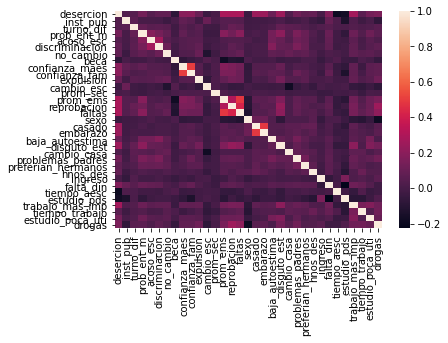

In [7]:
corr = ems.corr() 
sns.heatmap(corr, 
      xticklabels=corr.columns.values, 
      yticklabels=corr.columns.values) 

####  8.4.2  Histograma de las variables 
Se muestran los histogramas de las variables comparando a los alumnos que desertaron y a los que no desertaron

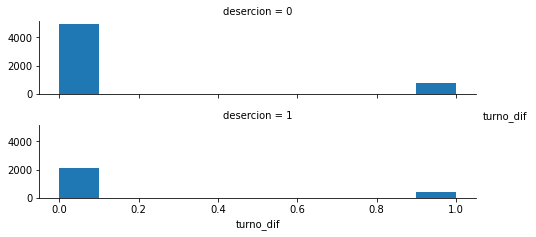

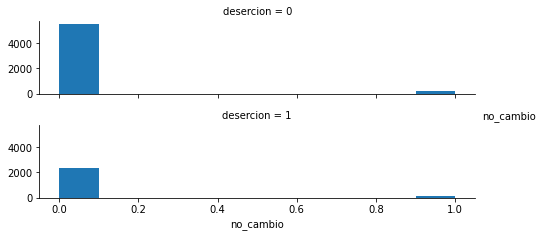

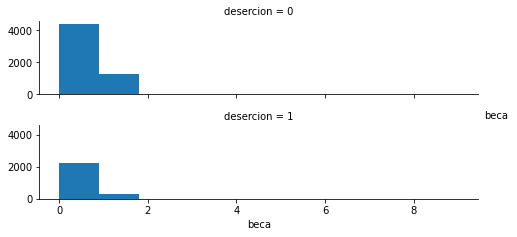

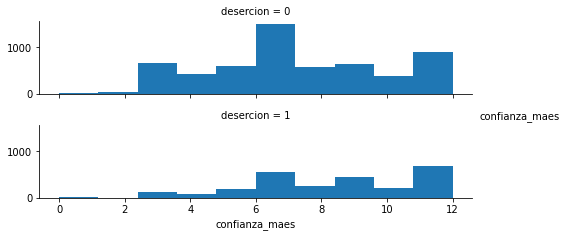

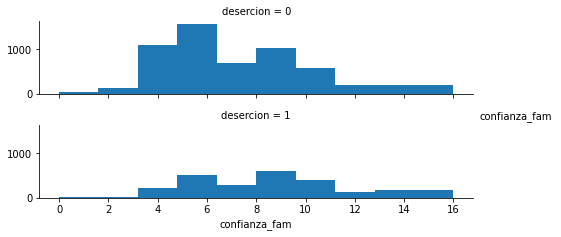

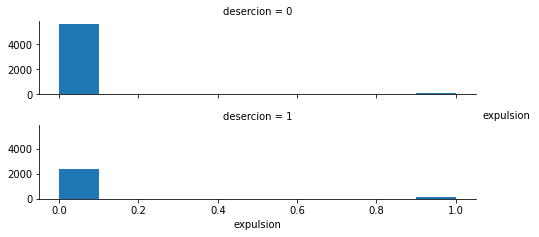

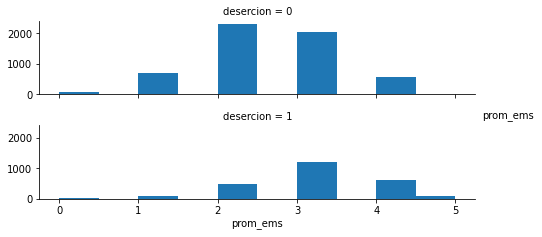

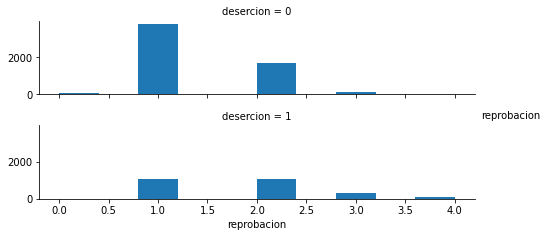

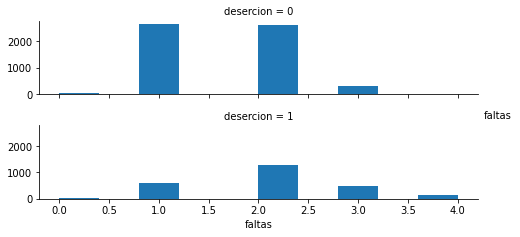

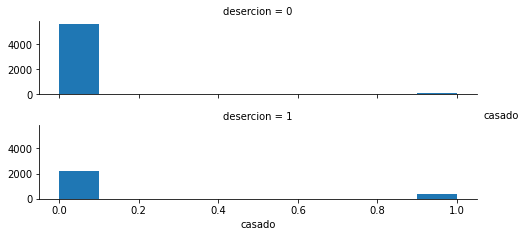

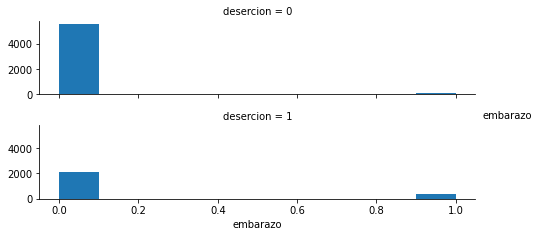

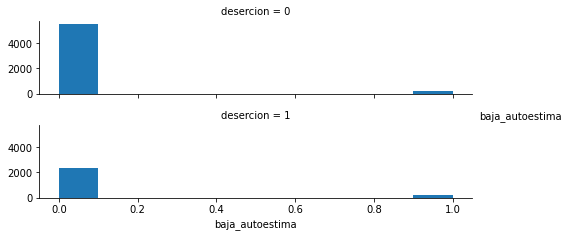

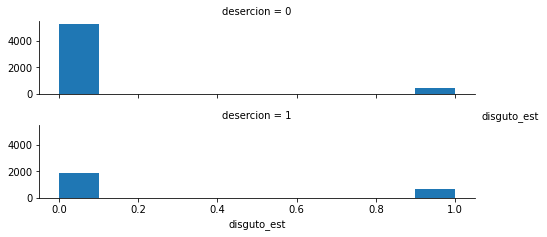

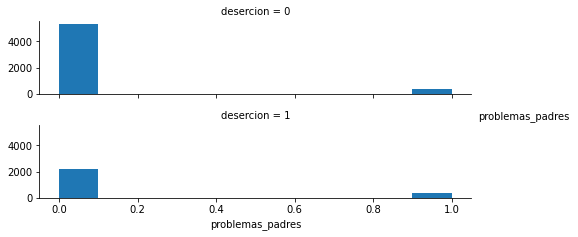

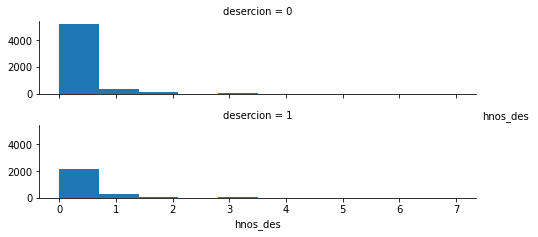

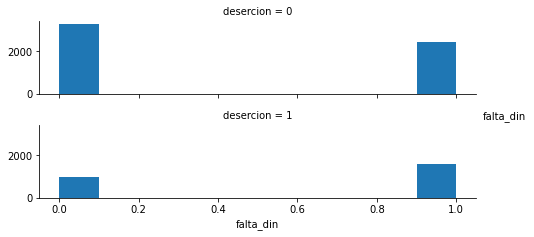

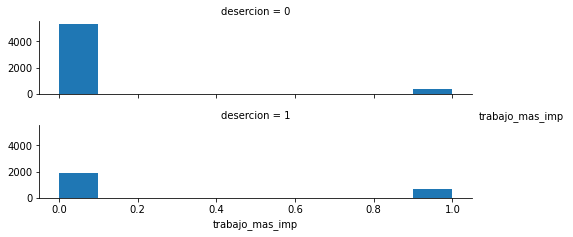

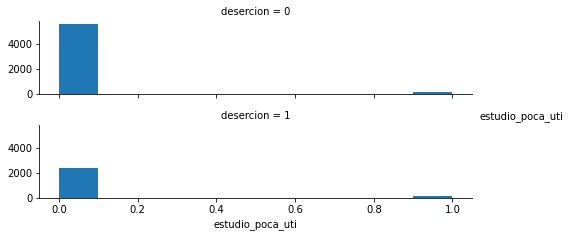

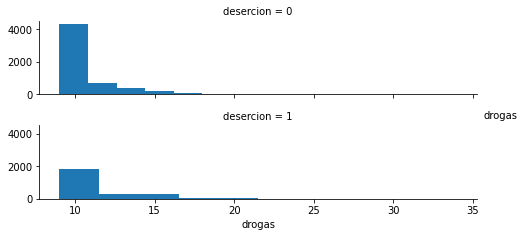

In [8]:
xx = ["turno_dif", "no_cambio", "beca", "confianza_maes", "confianza_fam", "expulsion", "prom_ems", "reprobacion", "faltas", "casado", "embarazo", "baja_autoestima", "disguto_est", "problemas_padres", "hnos_des", "falta_din", "trabajo_mas_imp", "estudio_poca_uti", "drogas"]

#X = ['desercion']+xx

#ems2 = ems

ordered = ems.desercion.value_counts().index

for x_var in xx : 
    g = sns.FacetGrid(ems, row="desercion", row_order=ordered,
                  height=1.7, aspect=4,)
#g.map(sns.hist, "reprobacion", hist=False, rug=False)
    g.map(plt.hist, x_var).add_legend(title=x_var)
    



### 8.5  Estimación del modelo

El trabajo fue realizado a través de la estimación de un modelo de Probabilidad Logística (PROBIT), donde se definió una variable dependiente $Y_i$ que considera si el joven encuestado no desertó de sus estudios con el valor 0 y si se trata de un caso de deserción considera el valor 1, y un vector $X_i$ que contiene a las diversas variables que contemplan los factores influyentes en la deserción y del cual depende la probabilidad de deserción de la educación media superior. 

In [9]:

Y = ems['desercion']

X = ["turno_dif", "no_cambio", "beca", "confianza_maes", "confianza_fam", "expulsion", "prom_ems", "reprobacion", "faltas", "casado", "embarazo", "baja_autoestima", "disguto_est", "problemas_padres", "hnos_des", "falta_din", "trabajo_mas_imp", "estudio_poca_uti", "drogas", "estudio_pds"]

X = ems[X]
X = sm.add_constant(X)

In [10]:
mdl = sm.Probit(Y, X)
 
mdl_fit = mdl.fit()

Optimization terminated successfully.
         Current function value: 0.454578
         Iterations 6


### 8.5.1  Resultados del modelo Probit

In [11]:
# Imprimiendo Resultados:
mdl_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:              desercion   No. Observations:                 8235
Model:                         Probit   Df Residuals:                     8214
Method:                           MLE   Df Model:                           20
Date:                Mon, 15 Jun 2020   Pseudo R-squ.:                  0.2653
Time:                        20:25:18   Log-Likelihood:                -3743.5
converged:                       True   LL-Null:                       -5095.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.8698      0.110    -26.185      0.000      -3.085      -2.655
turno_dif           -0.0194      0.047     -0.417      0.677      -0.111       0.072
no_cambio            0.1758      0.074      2.367      0.018       0.030       0.321
beca                -0.0971      0.026     -3.672      0.000      -0.149      -0.045
confianza_maes       0.0435      0.007      6.418      0.000       0.030       0.057
confianza_fam        0.0332      0.006      5.712      0.000       0.022       0.045
expulsion            0.2329      0.096      2.435      0.015       0.045       0.420
prom_ems             0.2107      0.021      9.976      0.000       0.169       0.252
reprobacion          0.2538      0.027      9.258      0.000       0.200       0.308
faltas               0.2020      0.026      7.637      0.000       0.150       0.254
casado               0.8476      0.075     11.276      0.000       0.700       0.995
embarazo             0.8275      0.072     11.550      0.000       0.687       0.968
baja_autoestima      0.2457      0.072      3.398      0.001       0.104       0.387
disguto_est          0.4829      0.048     10.105      0.000       0.389       0.577
problemas_padres     0.1488      0.056      2.643      0.008       0.038       0.259
hnos_des             0.0927      0.028      3.321      0.001       0.038       0.147
falta_din            0.3328      0.034      9.769      0.000       0.266       0.400
trabajo_mas_imp      0.6080      0.049     12.484      0.000       0.513       0.703
estudio_poca_uti     0.1971      0.085      2.308      0.021       0.030       0.364
drogas               0.0227      0.008      2.934      0.003       0.008       0.038
estudio_pds         -0.0646      0.007     -8.879      0.000      -0.079      -0.050
====================================================================================
"""

### 8.5.2 Estimación de los efectos marginales


In [12]:
mdl_margeff = mdl_fit.get_margeff()
mdl_margeff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
       Probit Marginal Effects       
=====================================
Dep. Variable:              desercion
Method:                          dydx
At:                           overall
====================================================================================
                      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
turno_dif           -0.0049      0.012     -0.417      0.677      -0.028       0.018
no_cambio            0.0448      0.019      2.369      0.018       0.008       0.082
beca                -0.0247      0.007     -3.674      0.000      -0.038      -0.012
confianza_maes       0.0111      0.002      6.457      0.000       0.008       0.014
confianza_fam        0.0085      0.001      5.744      0.000       0.006       0.011
expulsion            0.0593      0.024      2.437      0.015       0.012       0.107
prom_ems             0.0537      0.005     10.116      0.000       0.043       0.064
reprobacion          0.0647      0.007      9.394      0.000       0.051       0.078
faltas               0.0515      0.007      7.705      0.000       0.038       0.065
casado               0.2159      0.019     11.495      0.000       0.179       0.253
embarazo             0.2108      0.018     11.790      0.000       0.176       0.246
baja_autoestima      0.0626      0.018      3.404      0.001       0.027       0.099
disguto_est          0.1230      0.012     10.282      0.000       0.100       0.146
problemas_padres     0.0379      0.014      2.646      0.008       0.010       0.066
hnos_des             0.0236      0.007      3.328      0.001       0.010       0.038
falta_din            0.0848      0.009      9.915      0.000       0.068       0.102
trabajo_mas_imp      0.1549      0.012     12.825      0.000       0.131       0.179
estudio_poca_uti     0.0502      0.022      2.310      0.021       0.008       0.093
drogas               0.0058      0.002      2.938      0.003       0.002       0.010
estudio_pds         -0.0164      0.002     -8.983      0.000      -0.020      -0.013
====================================================================================
"""

### 8.5.3 Interpretación de los efectos marginales

Dentro de las variables con mayor impacto que influyen en la deserción escolar a nivel medio superior encontramos lo siguiente:
El hecho de estar casado eleva la probabilidad de desertar en un 21.59%, probabilidad similar al hecho de estar o embarazar a la pareja, la probabilidad de dejar la escuela es de 21.08%. El hecho de que a una persona le disguste estudiar hace que la probabilidad de desertar sea de 12.30%, lo cual tiene concordancia con la variable de considerar el trabajar mucho más importante que estudiar y el creer que estudiar tiene poca utilidad, al tener esto presente la deserción se eleva en 15.49% y 5.02% según sea el caso. 

Las variables que tiene una influencia menor en la deserción escolar encontramos que el haber reprobado alguna asignatura el individuo tiene una probabilidad de 6.47%, el tener conductas inapropiadas dentro de alguna institución hace que la persona sea expulsada de esta y genera una probabilidad de desertar de 5.93% porcentaje similar al presentado por el promedio presentado dentro de la escuela medio superior, 5.37%. Si los individuos presentan una baja autoestima, problemas con los padres tener hermanos desertores la probabilidad de abandonar los estudios es de 6.26%, 3.79% y 2.36% respectivamente. Las variables cuyo impacto es mínimo para desertar del bachillerato son, la confianza familiar y el hecho de consumir drogas, ambos tiene un porcentaje de 0.85% y 0.58% respectivamente. 

Los factores anteriores corresponden a una relación directa entre variable y deserción escolar, el modelo arrojó únicamente tres variables con relaciones negativas, la primera de ellas es la constantes, le sigue el hecho de tener una beca, lo cual tiene sentido, ya que la falta de ingreso suficiente en la familia genera una probabilidad de 8.48%, mientras que la asignación de una beca disminuye la deserción en 2.47%. Por último, a un mayor nivel de educación de los padres, la probabilidad de desertar disminuye en 1.64%, esto puede ser atribuido a que la mayor preparación de los padres permite brindar más apoyo con los trabajos escolares  a los estudiantes.


### 8.6 Prueba de hipótesis



In [13]:
# Establecemos la formula de la ecuación estimada:
formula = 'desercion ~ turno_dif + no_cambio + beca + confianza_maes + confianza_fam + expulsion + prom_ems + reprobacion + faltas + casado + embarazo + baja_autoestima + disguto_est + problemas_padres + hnos_des + falta_din + trabajo_mas_imp + estudio_poca_uti + drogas + estudio_pds'
results = ols(formula, ems).fit()

In [14]:

#Hipotesis
hypotheses_1 = 'turno_dif + no_cambio + beca + confianza_maes + confianza_fam + expulsion + prom_ems + reprobacion + faltas + casado + embarazo + baja_autoestima + disguto_est + problemas_padres + hnos_des + falta_din + trabajo_mas_imp + estudio_poca_uti + drogas + estudio_pds = 1'
t_test_1 = results.t_test(hypotheses_1)
print(t_test_1)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.4394      0.048      9.108      0.000       1.345       1.534


### 8.6.1 Interpretación de la de hipótesis
De la prueba de hipótesis realizada se puede obtener que los factores escolares, individuales y sociales estimados son relevantes para el modelo ya generan un impacto en la deserción estudiantil a nivel medio superior en México para el año 2011. 


## 9. Conclusiones

Dentro de los factores más importante que influyen en la deserción escolar y cuyo análisis se realizó con anterioridad, las causas que más impactan son las de índole individual, seguidas por los factores institucionales, aunque, los factores socioeconómicos también tienen un impacto similar a los institucionales. 
Debido a lo anterior, es importante poner atención en qué factores individuales pueden ser abordados no únicamente por el individuo, sino por las instituciones y de esta manera realizar un trabajo tripartito, individuo-instituciones-gobiernos para enfrentar la problemática y disminuir los índices de deserción en un nivel muy importante como lo es la medio superior.

## 10. Referencias

- Canagarajah, S. y Coulombe, H. (1998), "Child Labor and Schooling in Ghana", Policy Research Working Paper 1844. The World Bank: Washin

- Cope, R. y Hannar, 'W. Revolving College Doors: The causes and consequences of Dropping out and Transferring. New York, Wiley, 1975.  

- Cuéllar, M. (2014). Deserción en media superior: análisis de los factores escolares para la toma de decisiones de política pública. Facultad Latinoamericana de Ciencias Sociales, Ciudad de México, Gobierno y Política Pública.  

- Espíndola, E. y León, A. (2002). La deserción escolar en América: Un tema prioritario para la agenda regional. En: Revista Iberoamericana de educación, (30), pp. 39-62.

- Figueroa, A. y Nava, A. (2013) El abandono escolar en alumnos de bachillerato en Aguascalientes. El caso del Cecytea. En: Memoria del XII Congreso Nacional de Investigación Educativa. Gto., México: COMIE

- Landero, G. (2012). Deserción en la educación media superior en México. Instituto Tecnológico y de Estudios Superiores de Monterrey, Ciudad de México, Gobierno y Política Pública. 

- López, E., Velázquez, J. e Ibarra, G. (2011). Causas de la deserción escolar en el nivel medio superior en Baja California. En: Memoria del XI Congreso Nacional de Investigación Educativa. México: COMIE.

- Ranjan, R. (2000), "How Child Labor and Child Schooling Interact with Adult Labor" , World Bank Policy Research Working Paper 

- Rubio D. y Farías M. (2013). EFECTOS ESCOLARES EN LAS ESCUELAS DE NIVEL MEDIO SUPERIOR DE LA CIUDAD DE MÉXICO: Un estudio de valor agregado. Fondo de Cultura Económica, El Trimestre Económico. abril-junio de 2013. vol. 80. No. 318. pp. 371 - 399. 

- Sapelli C. y Torche A. (2004). Deserción Escolar y Trabajo Juvenil: ¿Dos Caras de Una Misma Decisión? En: Instituto de Economía, Pontificia Universidad Católica de Chile. Cuadernos de Economía, vol. 41. No. 123. pp. 173 - 198. 

- Tinto, V. (1989). Definir la deserción: una cuestión de perspectiva. Jossey-Bass Inc. Publisher. 1-9.

- (2012). Retrieved 13 June 2020, from https://www.gob.mx/cms/uploads/attachment/file/728/principales_cifras_2011_2012.pdf

- Encuesta Nacional de Deserción en la Educación Media Superior. (2012). Retrieved 9 June 2020, from http://www.sems.gob.mx/work/models/sems/Resource/10787/1/images/Anexo_6Reporte_de_la_ENDEMS.pdf